# 📊 Certification - Data Analyst - Product Sales

This analysis was conducted as part of the DataCamp Certification Program using the “Product Sales” dataset provided within the course environment.

## 1. Liberarys and files import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
df = pd.read_csv("product_sales.csv")

In [3]:
print("-- Shape --")
print(df.shape)

-- Shape --
(15000, 8)


In [4]:
print("-- First look --")
df.head()

-- First look --


,week,sales_method,customer_id,nb_sold,revenue,years_as_customer,nb_site_visits,state
0,2,Email,2e72d641-95ac-497b-bbf8-4861764a7097,10,NaN,0,24,Arizona
1,6,Email + Call,3998a98d-70f5-44f7-942e-789bb8ad2fe7,15,225.47,1,28,Kansas
2,5,Call,d1de9884-8059-4065-b10f-86eef57e4a44,11,52.55,6,26,Wisconsin
3,4,Email,78aa75a4-ffeb-4817-b1d0-2f030783c5d7,11,NaN,3,25,Indiana
4,3,Email,10e6d446-10a5-42e5-8210-1b5438f70922,9,90.49,0,28,Illinois


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               15000 non-null  int64  
 1   sales_method       15000 non-null  object 
 2   customer_id        15000 non-null  object 
 3   nb_sold            15000 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  15000 non-null  int64  
 6   nb_site_visits     15000 non-null  int64  
 7   state              15000 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 937.6+ KB


In [6]:
print(df.nunique())

week                     6
sales_method             5
customer_id          15000
nb_sold                 10
revenue               6743
years_as_customer       42
nb_site_visits          27
state                   50
dtype: int64


In [7]:
print(df.duplicated().sum())

0


In [8]:
print("--- Missing data ---")
print(df.isnull().sum())

--- Missing data ---
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue              1074
years_as_customer       0
nb_site_visits          0
state                   0
dtype: int64


In [9]:
print("------ Zero values -----")
print(df.isin([0]).sum())

------ Zero values -----
week                    0
sales_method            0
customer_id             0
nb_sold                 0
revenue                 0
years_as_customer    1471
nb_site_visits          0
state                   0
dtype: int64


In [10]:
print(df['sales_method'].unique())

['Email' 'Email + Call' 'Call' 'em + call' 'email']


| Column                | Description                                                    | Validation and Cleaning Steps                                                                                             |
| --------------------- | -------------------------------------------------------------- | ------------------------------------------------------------------------------------------------------------------------- |
| **week**              | Sales week number (values from 1 to 6).                        | Checked for missing or out-of-range values — all entries valid.                                                           |
| **sales_method**      | Type of sales interaction: *Email*, *Call*, or *Email + Call*. | Standardized inconsistent entries (e.g., `email`, `em + call`) to consistent labels: `Emails`, `Calls`, `Email and Call`. |
| **customer_id**       | Unique customer identifier.                                    | Verified uniqueness — no duplicates found.                                                                                |
| **nb_sold**           | Number of products purchased by the customer.                  | Checked for zero or missing values — all values are positive and complete.                                                |
| **revenue**           | Total revenue generated from each customer (in USD).           | Identified 1,074 missing values — removed rows with missing revenue using `df.dropna(subset=['revenue'])`.                |
| **years_as_customer** | Number of years the customer has been with the company.        | Contains 1,471 zeros representing new customers. No missing values.                                                       |
| **nb_site_visits**    | Number of times the customer visited the company’s website.    | All values valid; distribution checked for outliers.                                                                      |
| **state**             | U.S. state where the customer is located.                      | Verified consistency of state names — no missing or invalid entries.                                                      |


---
**Findings (EN):**
The dataset contains 15,000 records and 8 columns describing sales data. The sales_method variable includes multiple label variations (e.g., “Email”, “email”, “em + call”), indicating the need to standardize sales method names before analysis. The data spans six sales weeks (week from 1 to 6), 50 states (state), and 10 unique values for the number of products sold (nb_sold). The revenue column has 1,074 missing values, which should be handled through imputation or removal during data cleaning. The years_as_customer column contains 1,471 zero values, possibly representing new customers or missing tenure information. The absence of zero or missing values in the remaining columns indicates overall good data quality. The dataset’s moderate size (approx. 940 KB) makes it suitable for exploratory analysis and predictive modeling.

## 2. Sales method standarisation

In [15]:
df['sales_method'] = df['sales_method'].replace({
    'Email': 'Emails',
    'Call': 'Calls',
    'Email + Call': 'Email and Call',
    'em + call': 'Email and Call',
    'email': 'Emails'
})

print(df['sales_method'].unique())

['Emails' 'Email and Call' 'Calls']


In [16]:
df = df.dropna(subset=['revenue'])

In [17]:
df.to_csv("product_sales_clean.csv", index=False)

In [18]:
df = pd.read_csv("product_sales_clean.csv")
print(df['sales_method'].unique())

['Email and Call' 'Calls' 'Emails']


In [19]:
print(df.isnull().sum())

week                 0
sales_method         0
customer_id          0
nb_sold              0
revenue              0
years_as_customer    0
nb_site_visits       0
state                0
dtype: int64


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13926 entries, 0 to 13925
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   week               13926 non-null  int64  
 1   sales_method       13926 non-null  object 
 2   customer_id        13926 non-null  object 
 3   nb_sold            13926 non-null  int64  
 4   revenue            13926 non-null  float64
 5   years_as_customer  13926 non-null  int64  
 6   nb_site_visits     13926 non-null  int64  
 7   state              13926 non-null  object 
dtypes: float64(1), int64(4), object(3)
memory usage: 870.5+ KB


---
**Findings (EN):**
The data has been cleaned and prepared for further analysis. The sales_method variable was standardized, and 1,074 records with missing revenue values were removed, representing approximately 7.16% of all observations (1,074 / 15,000). The decision to remove missing values was made because they accounted for a small portion of the dataset, and imputing them could have introduced unwanted distortions in the revenue analysis.

## 3. Corelation overview

In [37]:
numeric_cols = ['nb_sold', 'revenue', 'years_as_customer', 'nb_site_visits']
corr_matrix = df[numeric_cols].corr(method='pearson')
print(corr_matrix)

                    nb_sold   revenue  years_as_customer  nb_site_visits
nb_sold            1.000000  0.696165          -0.098333        0.487669
revenue            0.696165  1.000000          -0.064696        0.323089
years_as_customer -0.098333 -0.064696           1.000000       -0.049012
nb_site_visits     0.487669  0.323089          -0.049012        1.000000


**Findings (EN):**
The number of units sold (nb_sold) has a strong positive correlation with revenue (revenue), meaning that higher volume directly drives profit.
Customer activity (nb_site_visits) is also positively correlated with revenue — more engaged visitors spend more.
Customer tenure (years_as_customer) shows weaker correlation with revenue, which implies that loyalty alone is not the main driver; engagement is.
Across sales methods, the nb_sold vs revenue correlation stays positive but is strongest for the combined Email + Call channel, suggesting it's the most effective at converting product volume into revenue.

## 4. Weekly sales

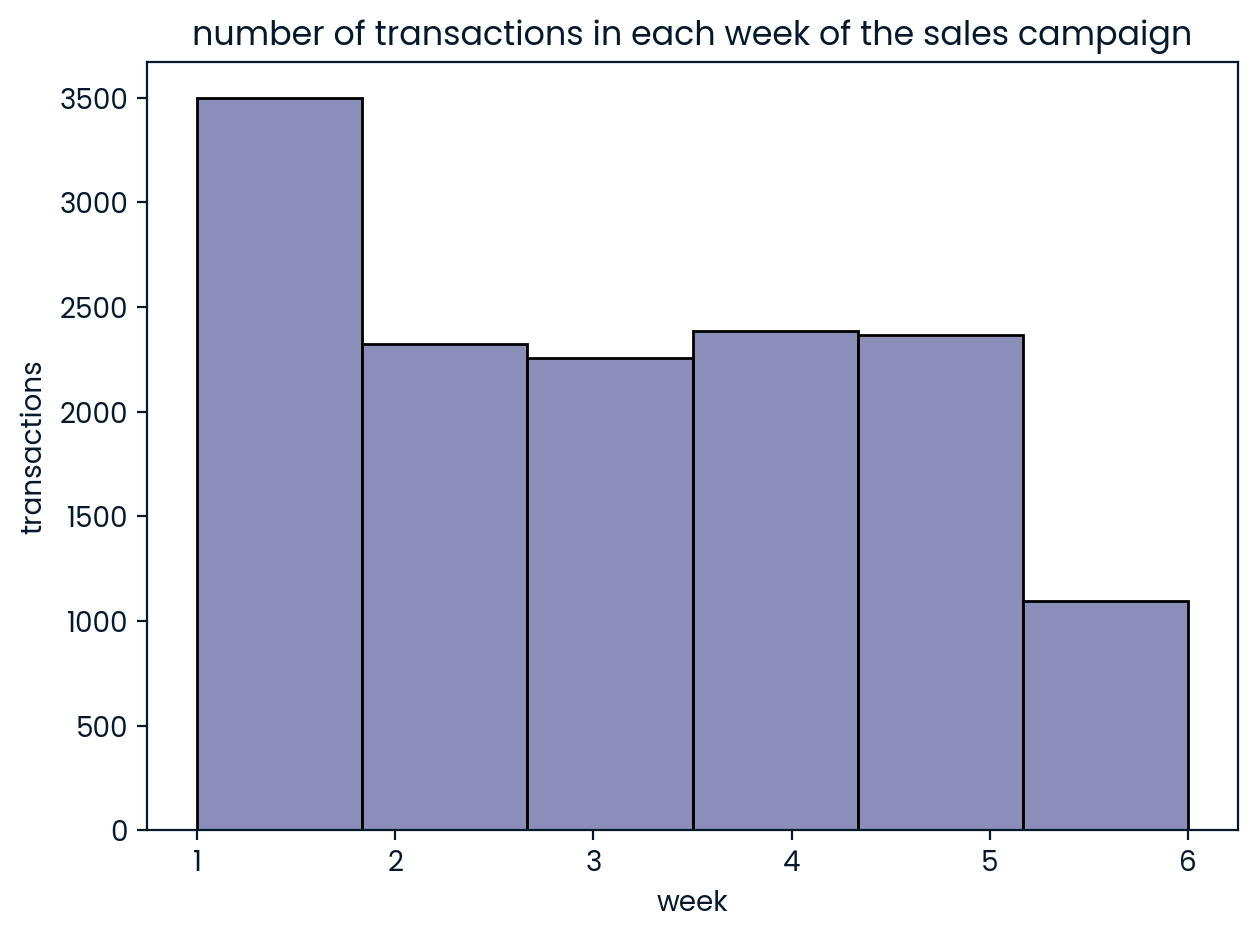

In [26]:
sns.histplot(df['week'], bins=6)
plt.title('number of transactions in each week of the sales campaign')
plt.xlabel('week')
plt.ylabel('transactions')
plt.tight_layout()
plt.show()

**Findings (EN):**
The histogram shows the number of transactions in each week of the sales campaign. The highest sales occurred in the initial weeks after the product launch, indicating a strong early interest effect. In later weeks, the number of transactions stabilizes or slightly decreases, suggesting the need for demand-sustaining activities.

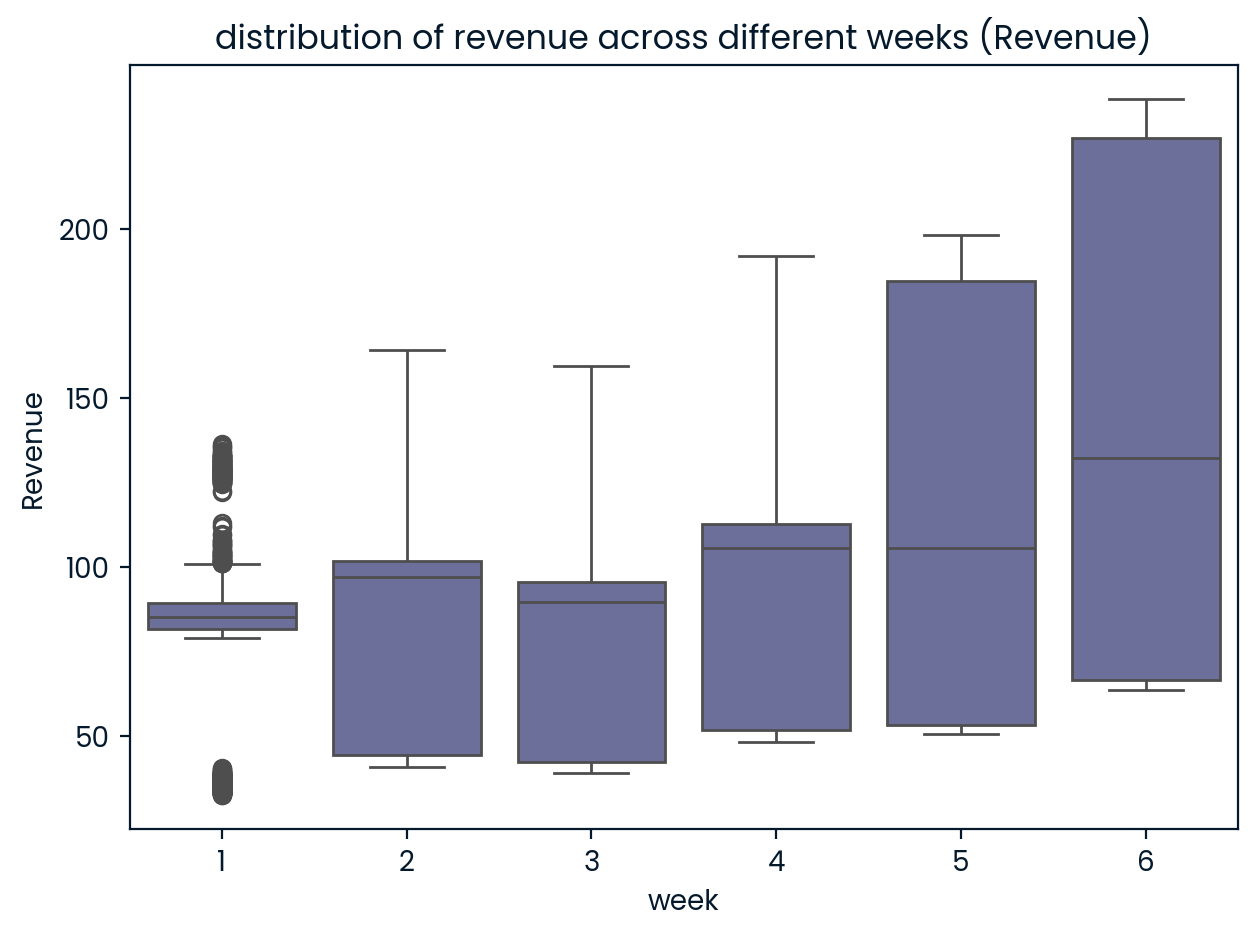

In [25]:
sns.boxplot(data=df, x='week', y='revenue')
plt.title('distribution of revenue across different weeks (Revenue)')
plt.xlabel('week')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

**Findings (EN)**
The boxplot shows the distribution of revenue across different weeks. Outliers are visible, indicating occasional instances of very high purchases. The median revenue remains relatively consistent across weeks, suggesting stability in sales value, though variability is still noticeable.

In [23]:
from sklearn.linear_model import LinearRegression

trend = df.groupby(['week', 'sales_method'])['revenue'].mean().reset_index()

preds = []

for method in trend['sales_method'].unique():
    subset = trend[trend['sales_method'] == method]
    
    X = subset['week'].values.reshape(-1, 1)
    y = subset['revenue'].values
    
    model = LinearRegression()
    model.fit(X, y)
    
    future_weeks = np.arange(1, 8).reshape(-1, 1)
    y_pred = model.predict(future_weeks)
    
    temp = pd.DataFrame({
        'week': future_weeks.flatten(),
        'predicted_revenue': y_pred,
        'sales_method': method
    })
    preds.append(temp)

pred_df = pd.concat(preds, ignore_index=True)

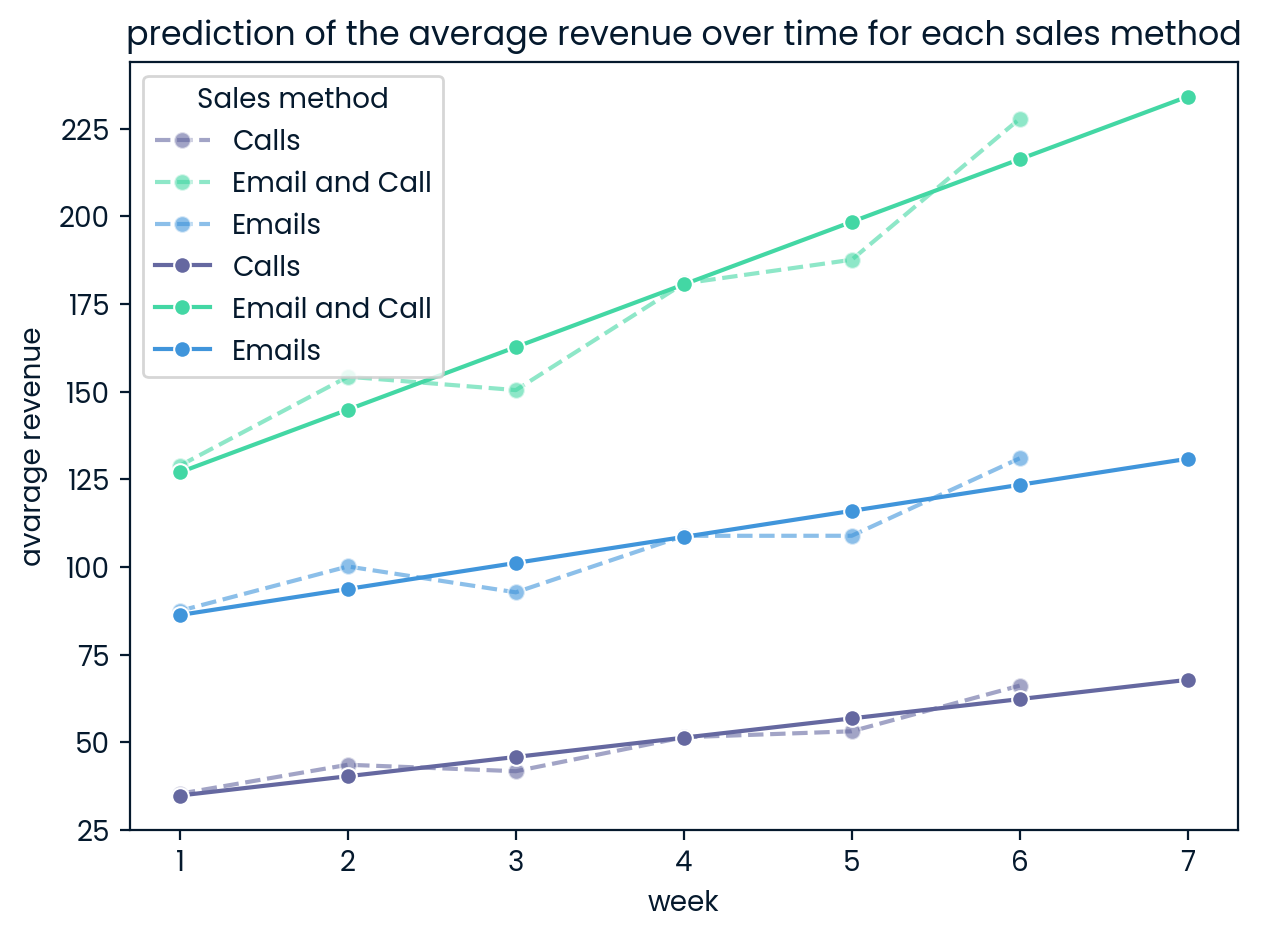

In [27]:
sns.lineplot(data=trend, x='week', y='revenue', hue='sales_method', marker='o', linestyle='--', alpha=0.6)
sns.lineplot(data=pred_df, x='week', y='predicted_revenue', hue='sales_method', marker='o')

plt.title('prediction of the average revenue over time for each sales method')
plt.xlabel('week')
plt.ylabel('avarage revenue')
plt.legend(title='Sales method')
plt.tight_layout()
plt.show()

**Findings (EN)**
The line chart with prediction shows the average revenue over time for each sales method. The linear regression model forecasts continued revenue growth for the Email and Call method, while Email and Call remain relatively stable. This indicates that combining communication channels may be the most effective sales strategy in the upcoming weeks.

---
## 5. Sales method

sales_method
Calls             4781
Email and Call    2223
Emails            6922
Name: customer_id, dtype: int64


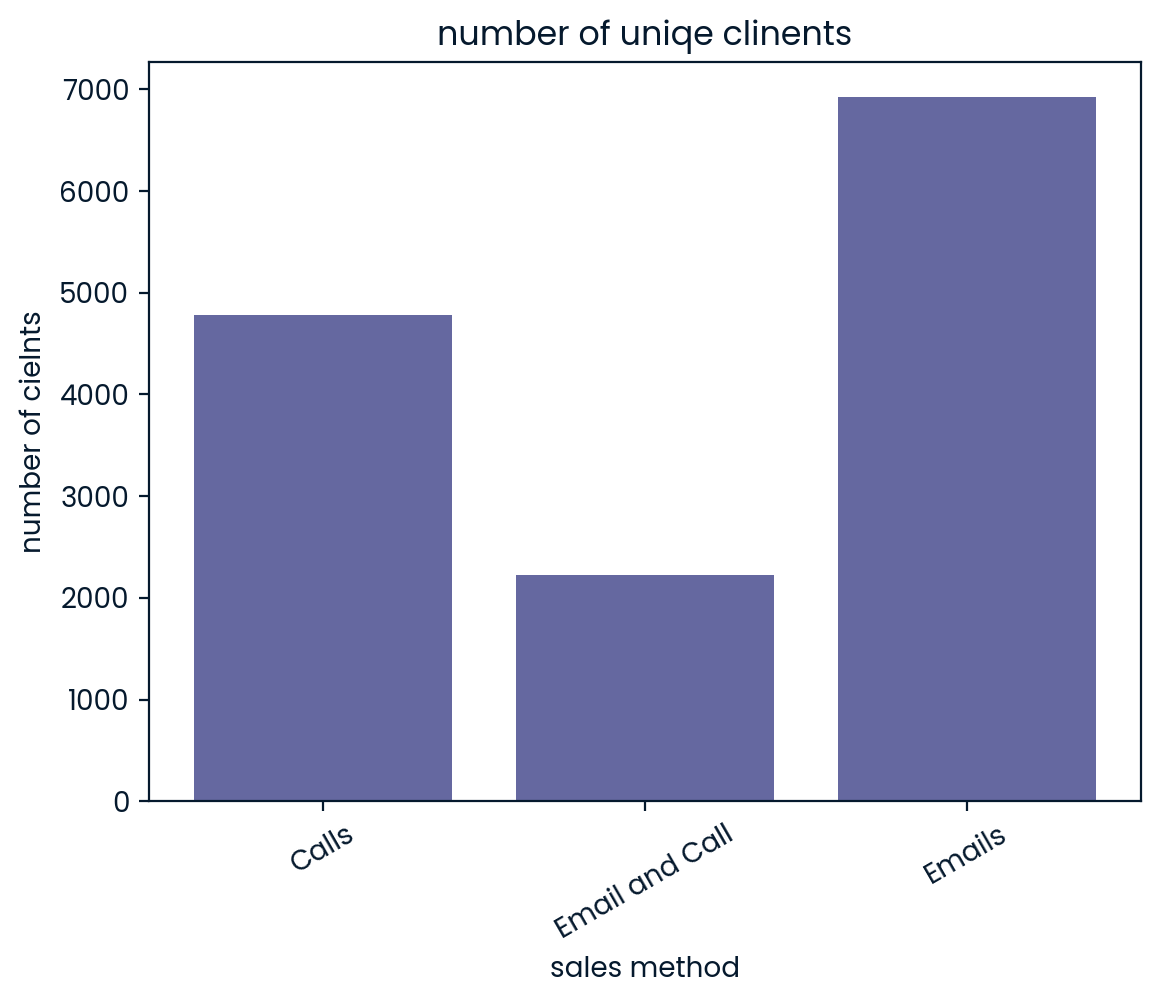

In [30]:
counts = df.groupby('sales_method')['customer_id'].nunique()
print(counts)
plt.bar(counts.index, counts.values)
plt.title("number of uniqe clinents")
plt.xlabel("sales method")
plt.ylabel("number of cielnts")
plt.xticks(rotation=30)
plt.show()

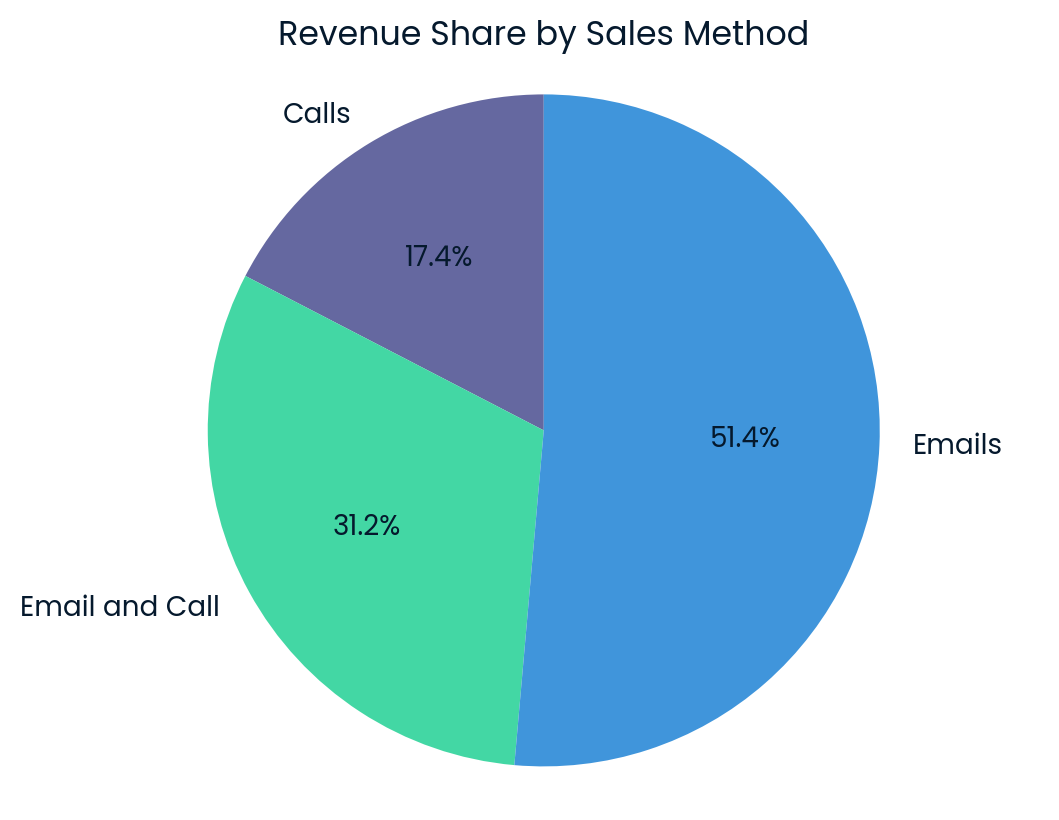

In [56]:
revenue_share = df.groupby('sales_method')['revenue'].sum()

plt.pie(revenue_share, labels=revenue_share.index, autopct='%1.1f%%',
        startangle=90)
plt.title('Revenue Share by Sales Method')
plt.axis('equal')
plt.show()

**Findings (EN):**
The analysis of sales methods shows that the email-based approach was the most frequently used, but the combined method (Email + Call) generated the highest revenue and sales volume.
Sales conducted exclusively via phone calls were the least effective in both revenue and number of units sold.

## 6. Products sold

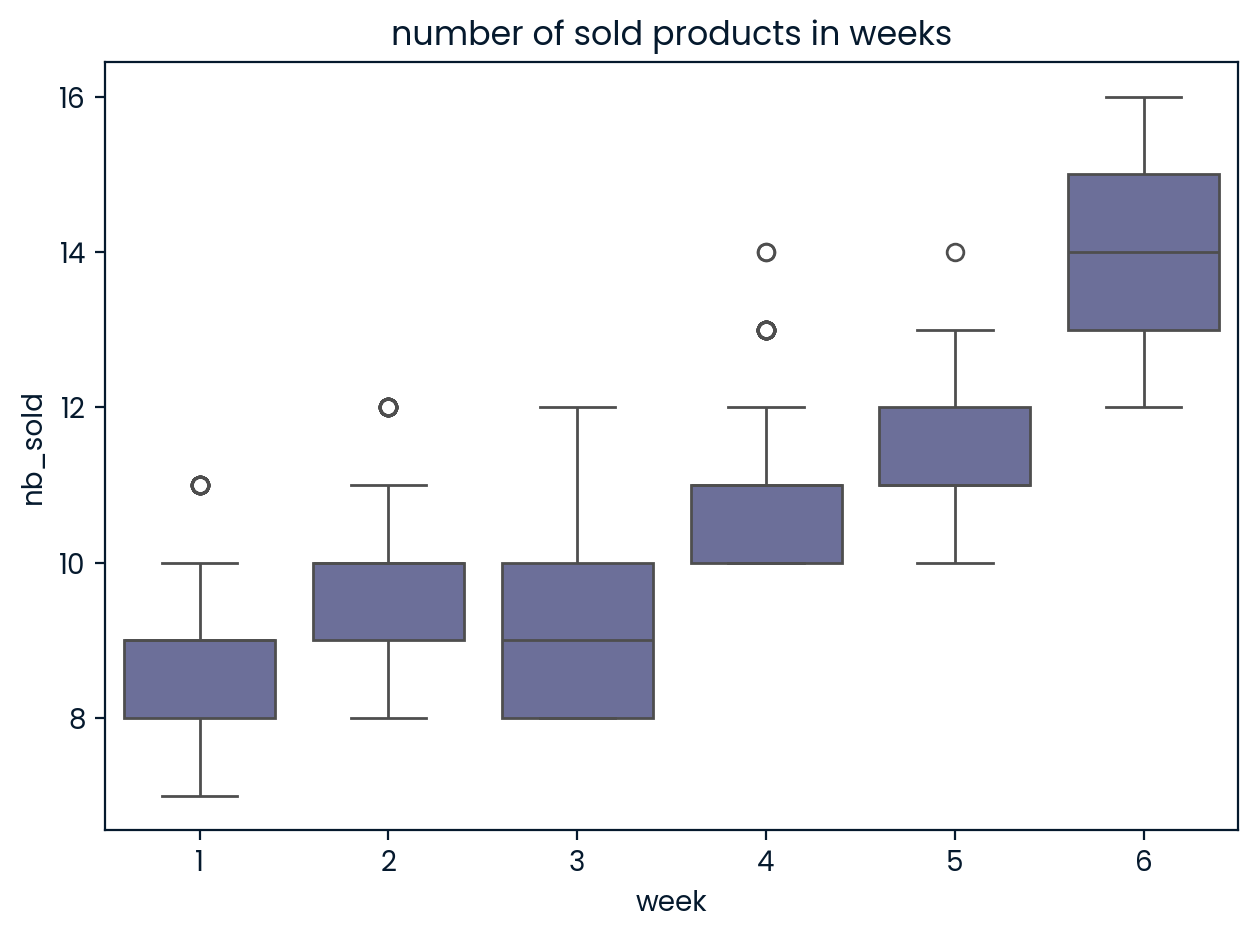

In [35]:
sns.boxplot(data=df, x='week', y='nb_sold')
plt.title('number of sold products in weeks')
plt.tight_layout()
plt.show()

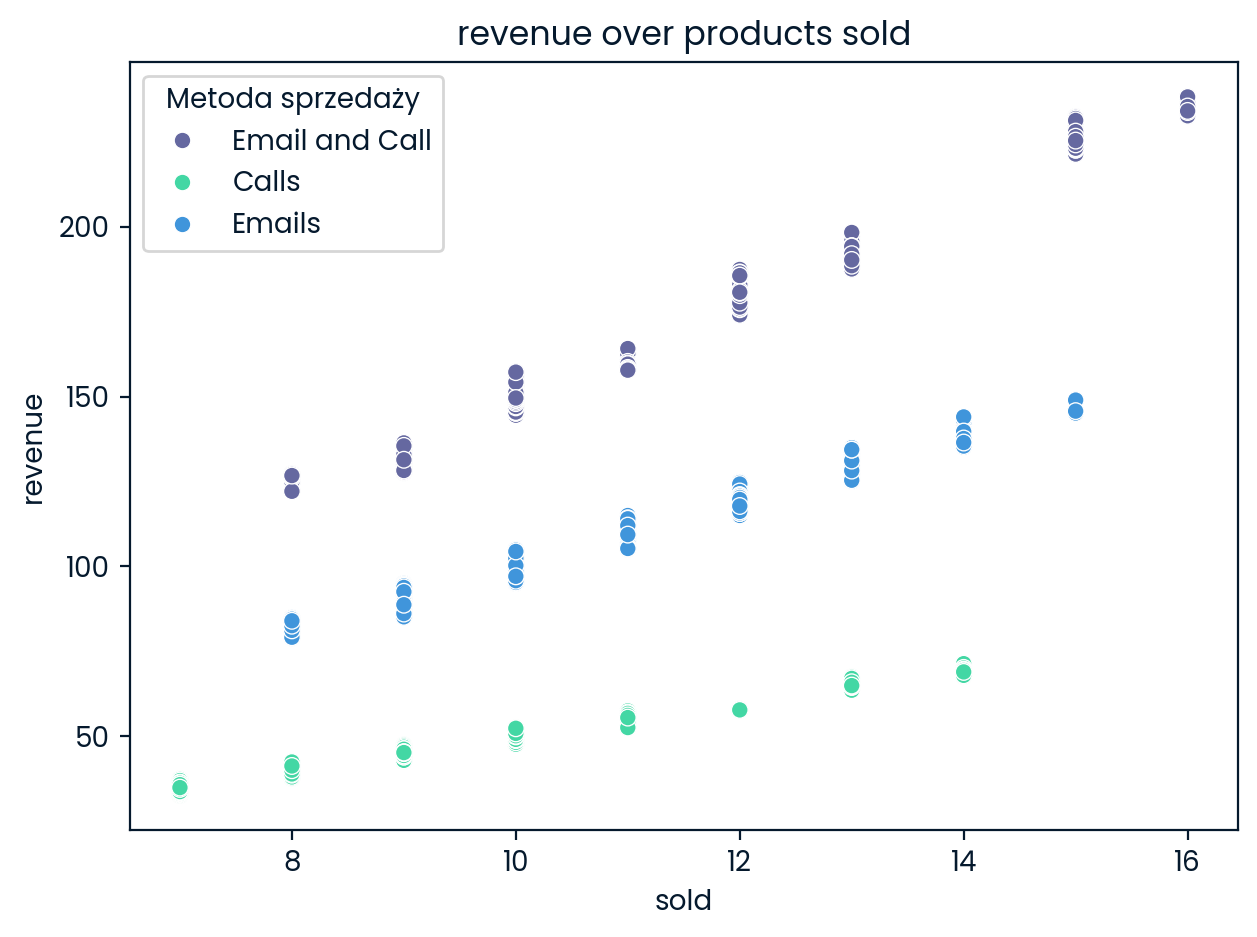

In [33]:
sns.scatterplot(data=df, x='nb_sold', y='revenue', hue='sales_method')
plt.title('revenue over products sold')
plt.xlabel('sold')
plt.ylabel('revenue')
plt.legend(title='Metoda sprzedaży')
plt.tight_layout()
plt.show()

**Findings (EN):**
Sales became more varied over time in later weeks, some customers bought more while others stopped purchasing.
The average number of sold items stayed stable, but the spread widened with more outliers.
There’s a clear positive correlation between units sold and revenue higher volume meant higher profit.
The Email + Call method achieved the best results, while Call was the least effective.

---
## 7. Revenue

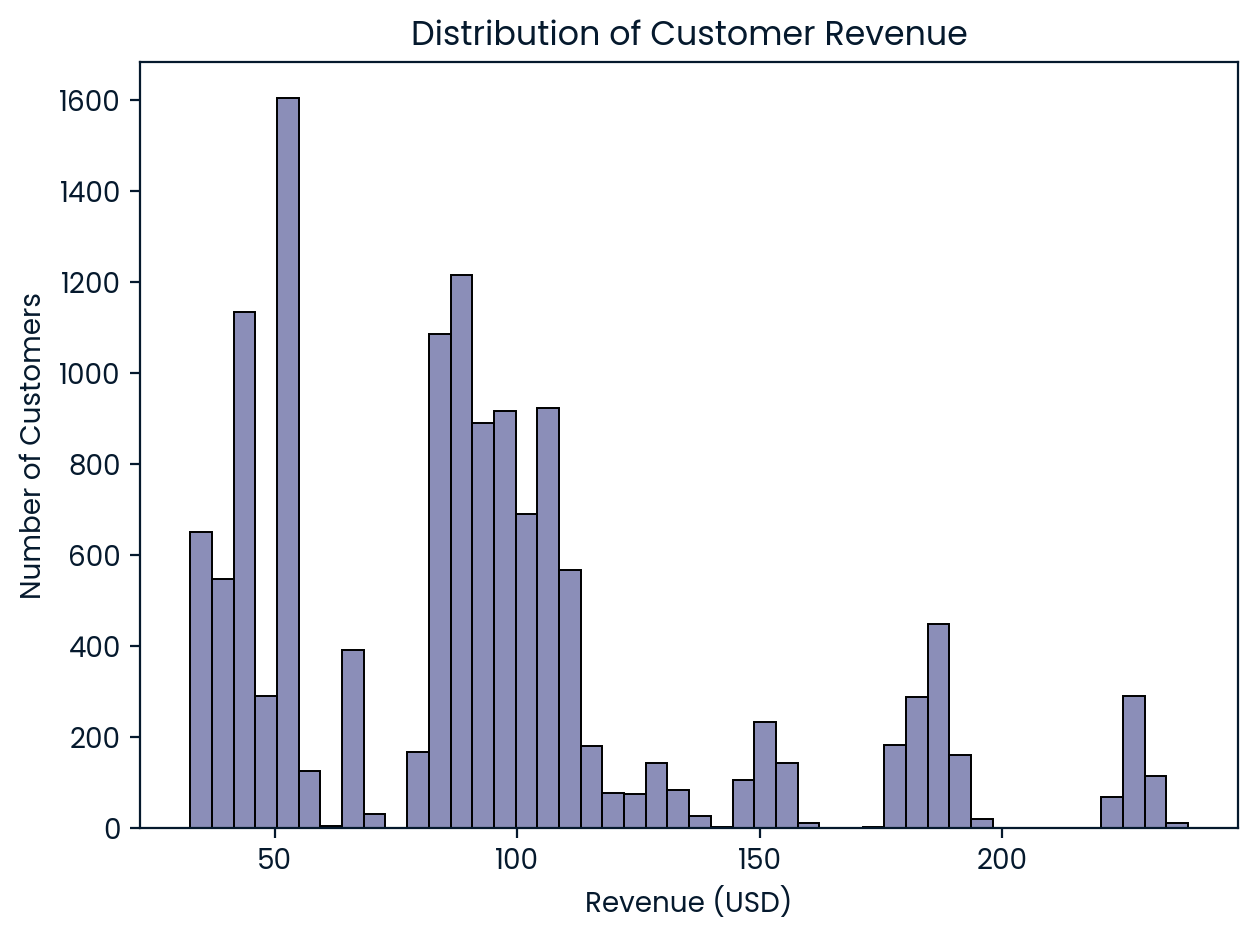

In [55]:
sns.histplot(df['revenue'])
plt.title('Distribution of Customer Revenue')
plt.xlabel('Revenue (USD)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

---
## 8. Regular customers

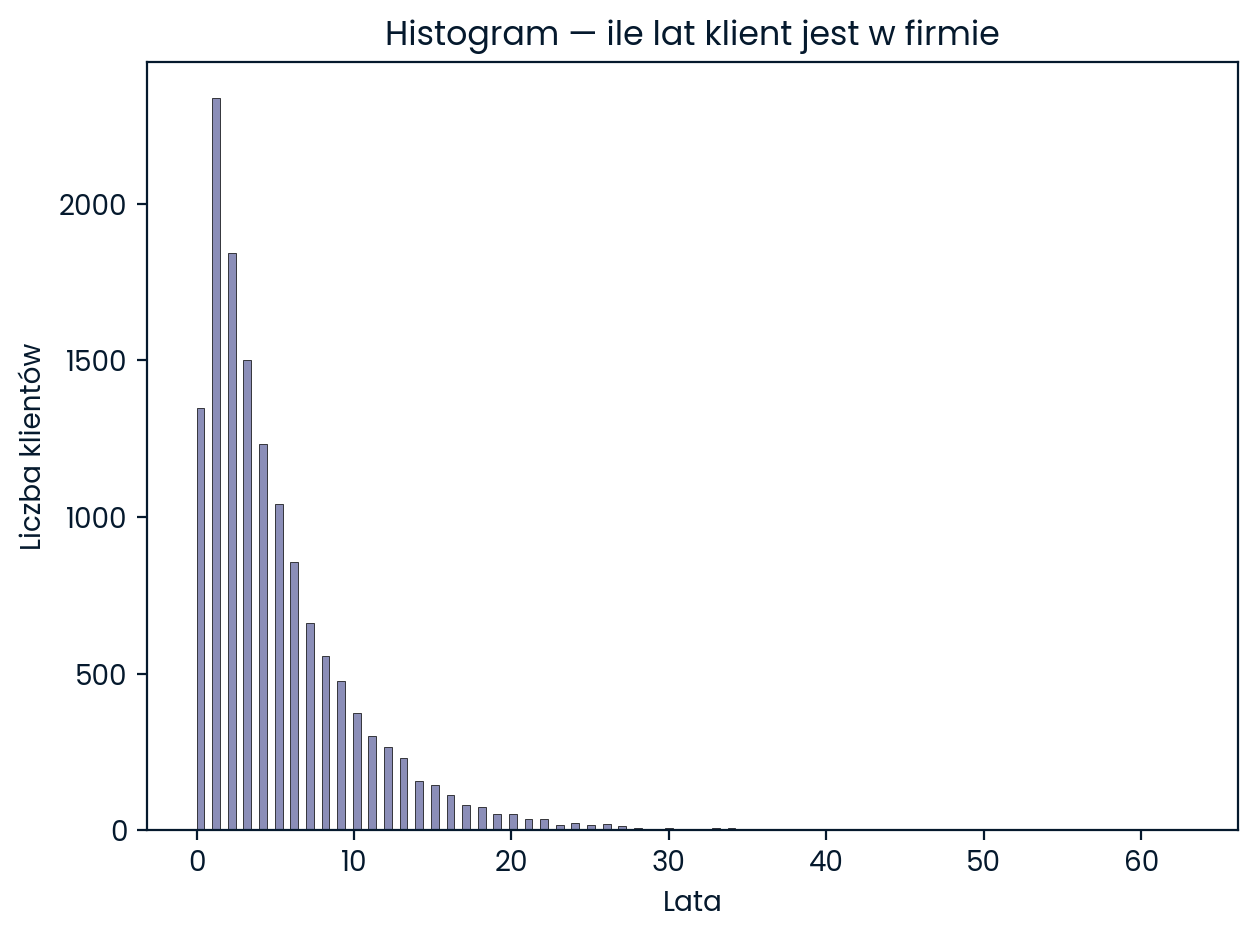

In [39]:
sns.histplot(df['years_as_customer'])
plt.title('Histogram — ile lat klient jest w firmie')
plt.xlabel('Lata')
plt.ylabel('Liczba klientów')
plt.tight_layout()
plt.show()

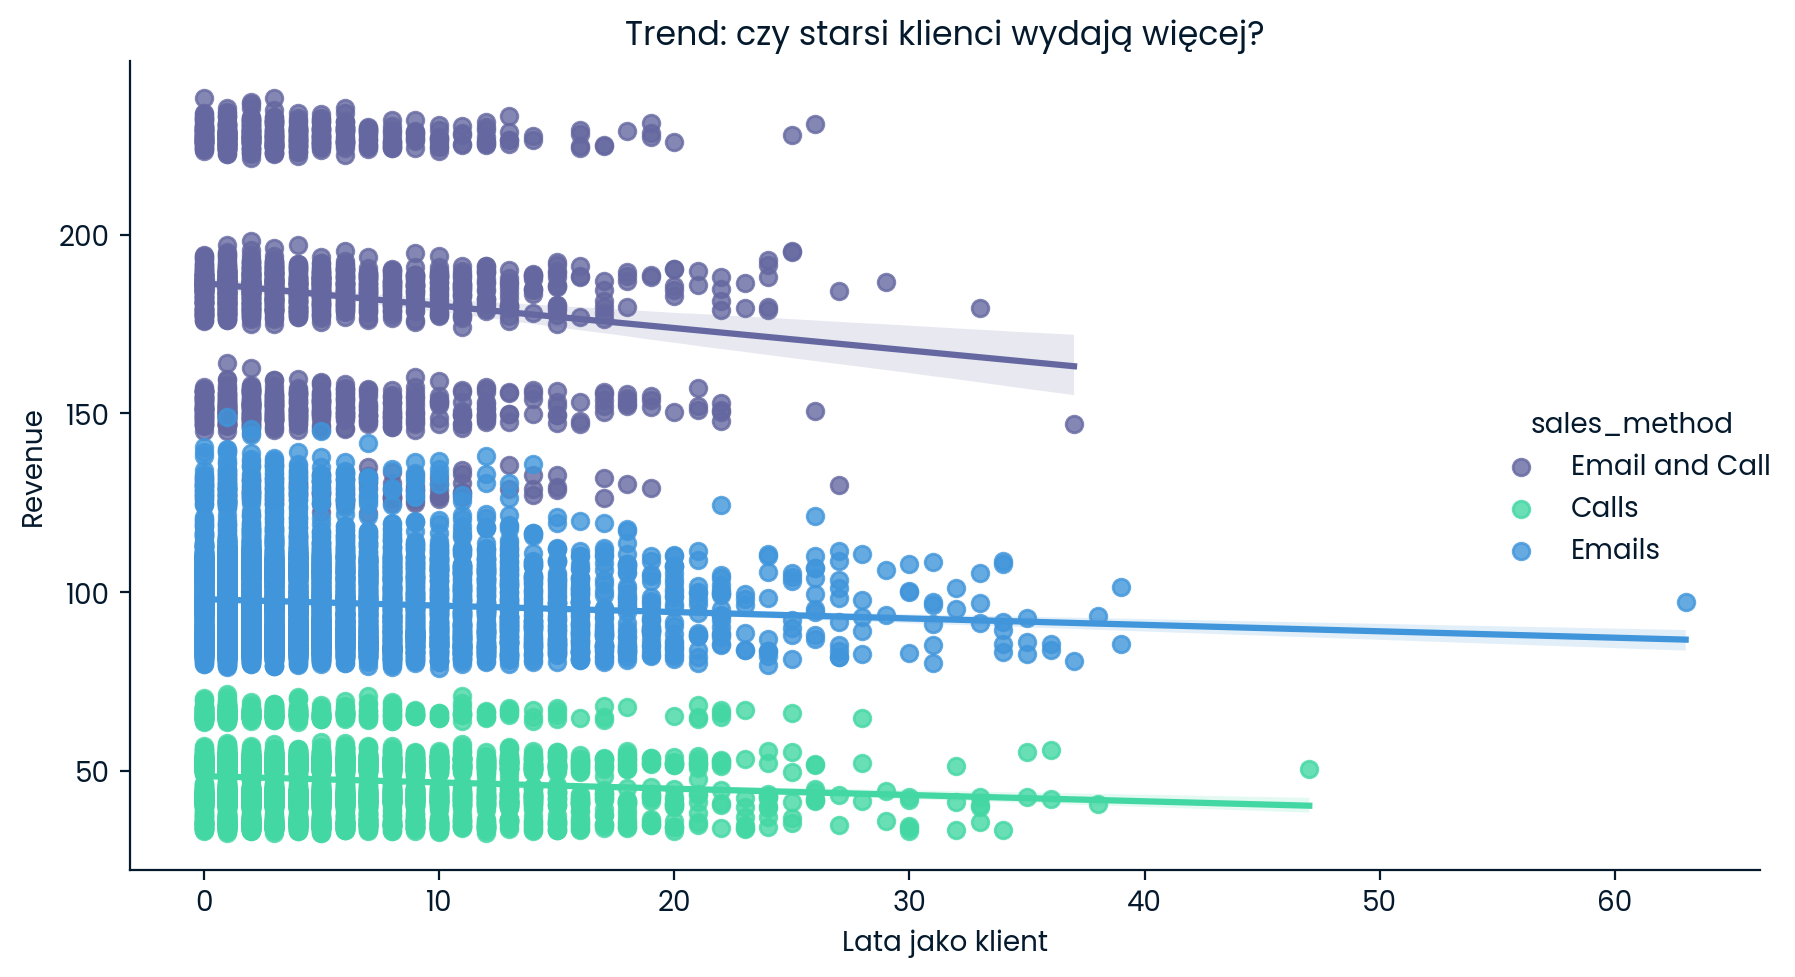

In [40]:
sns.lmplot(data=df, x='years_as_customer', y='revenue', hue='sales_method', height=5, aspect=1.5)
plt.title('Trend: czy starsi klienci wydają więcej?')
plt.xlabel('Lata jako klient')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

**Findings (EN):**
Most customers are relatively new (0–2 years), while long-term clients are rare.
The regression plot shows a slight upward trend — older customers spend a bit more, though the effect is modest.

## 9. Site visits

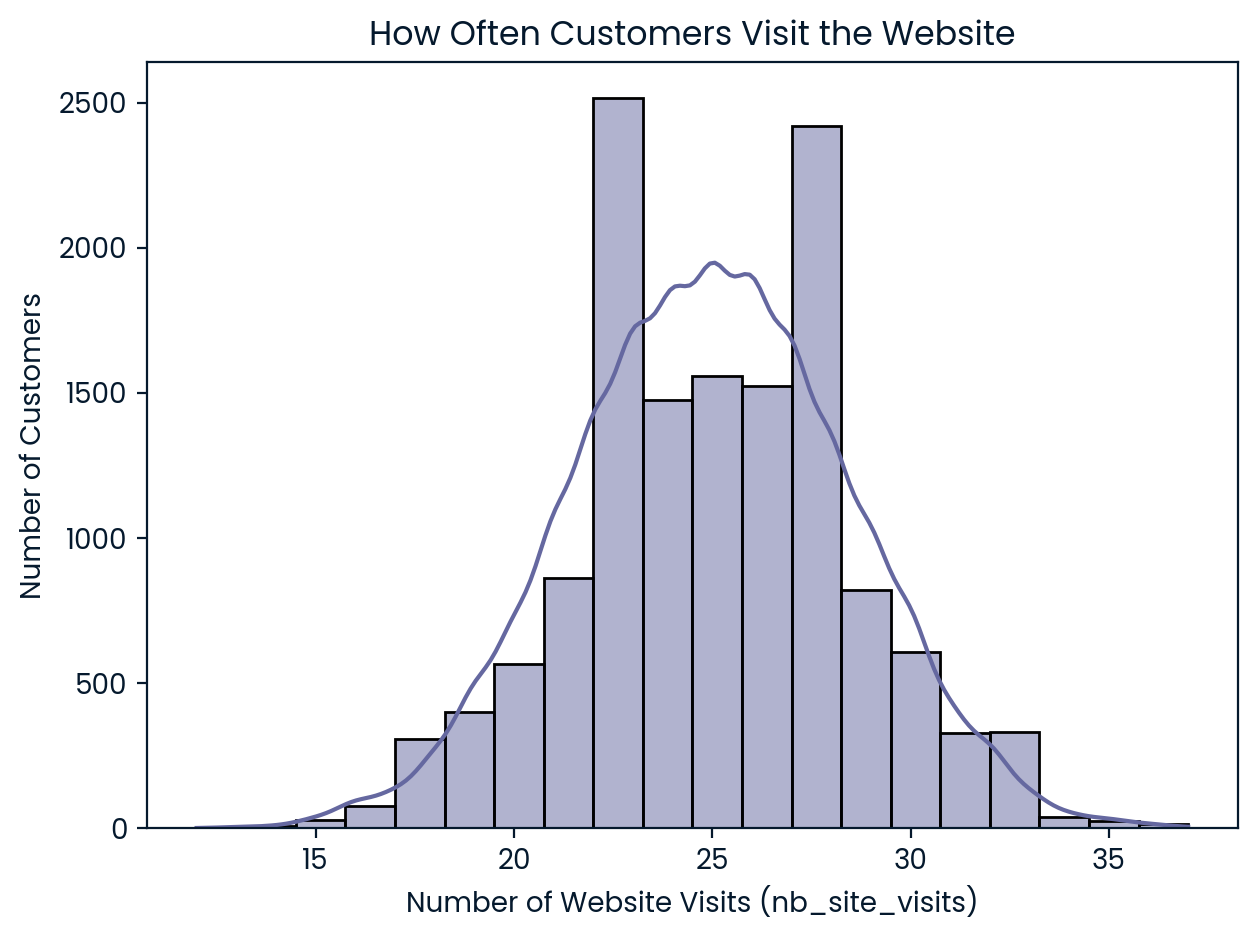

In [44]:
sns.histplot(df['nb_site_visits'], bins=20, kde=True)
plt.title('How Often Customers Visit the Website')
plt.xlabel('Number of Website Visits (nb_site_visits)')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

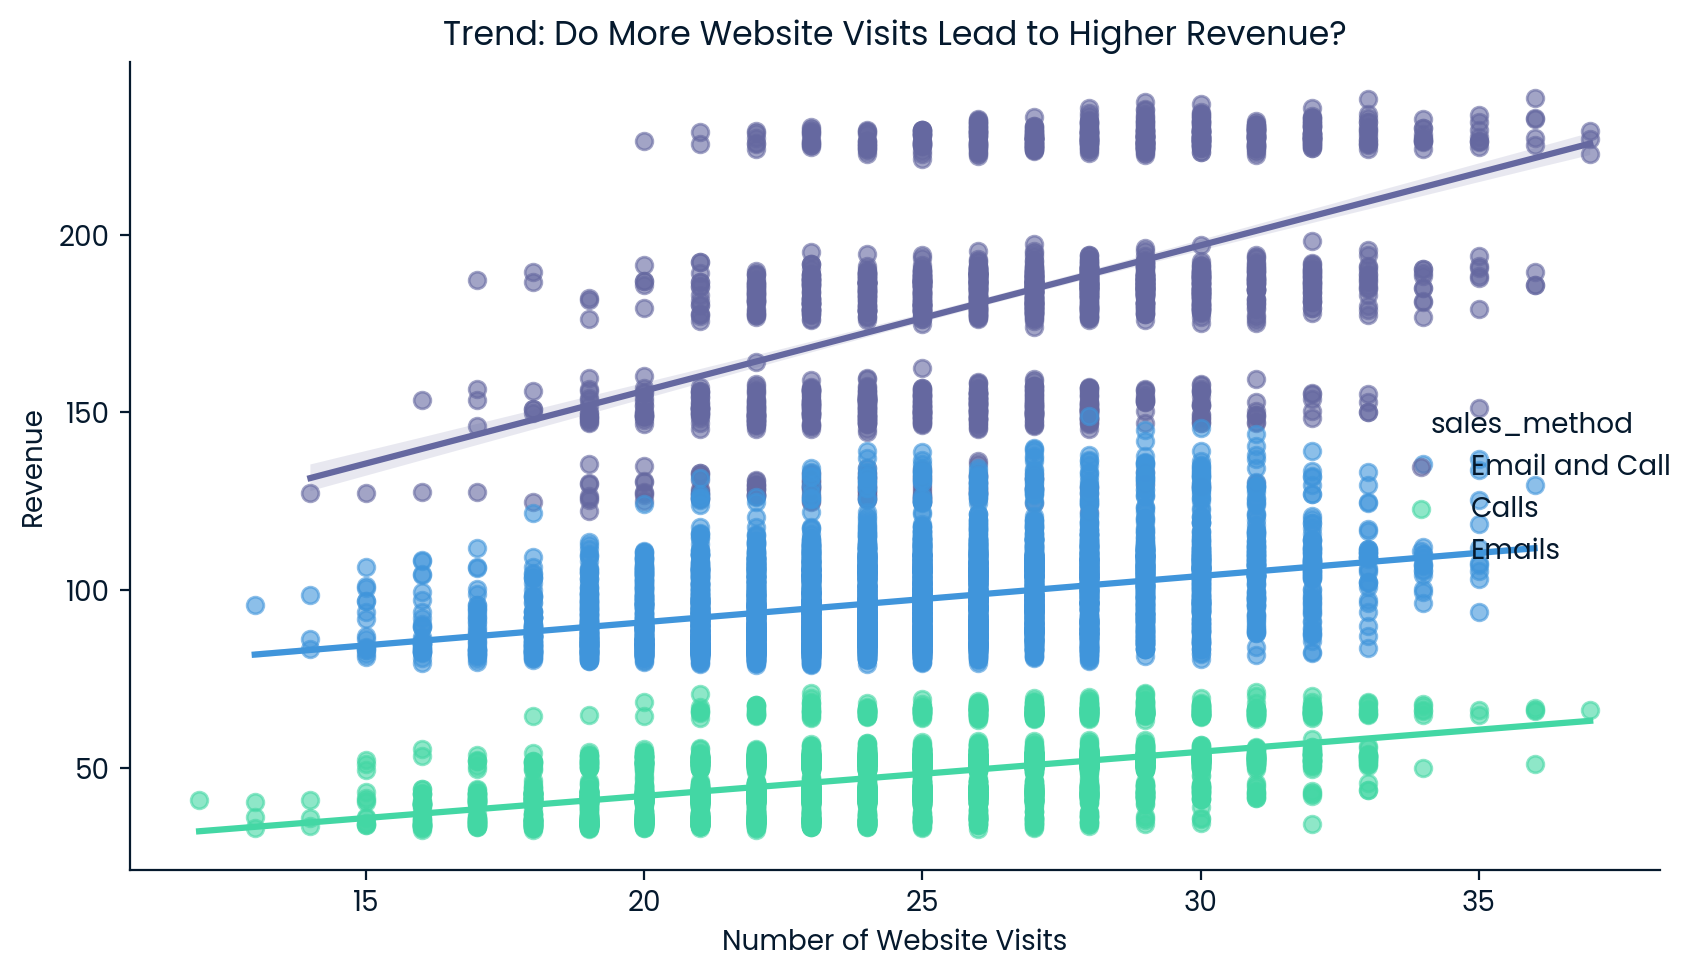

In [45]:
sns.lmplot(data=df, x='nb_site_visits', y='revenue', hue='sales_method',
           height=5, aspect=1.4, scatter_kws={'alpha':0.6})
plt.title('Trend: Do More Website Visits Lead to Higher Revenue?')
plt.xlabel('Number of Website Visits')
plt.ylabel('Revenue')
plt.tight_layout()
plt.show()

**Findings (EN):**
The histogram shows that most customers visit the website between 20 and 30 times, with few extreme values. There is a clear positive relationship between visit frequency and revenue — more active users generate higher profits.

---
## 10. Region

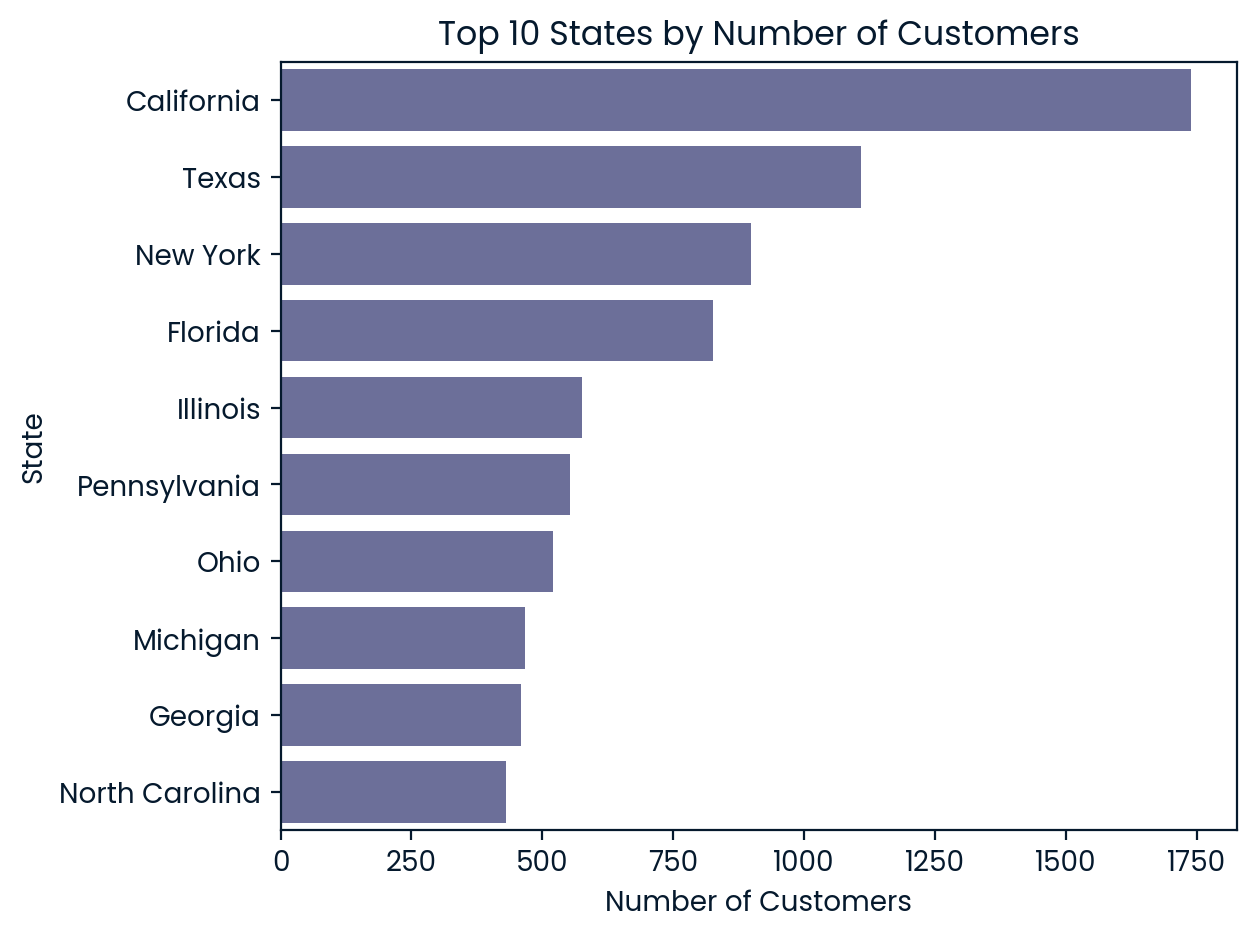

In [47]:
state_counts = df['state'].value_counts().head(10)

sns.barplot(x=state_counts.values, y=state_counts.index)
plt.title('Top 10 States by Number of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('State')
plt.tight_layout()
plt.show()

In [48]:
revenue_by_state = (
    df.groupby('state')['revenue']
      .mean()
      .sort_values(ascending=False)
      .head(10)
)

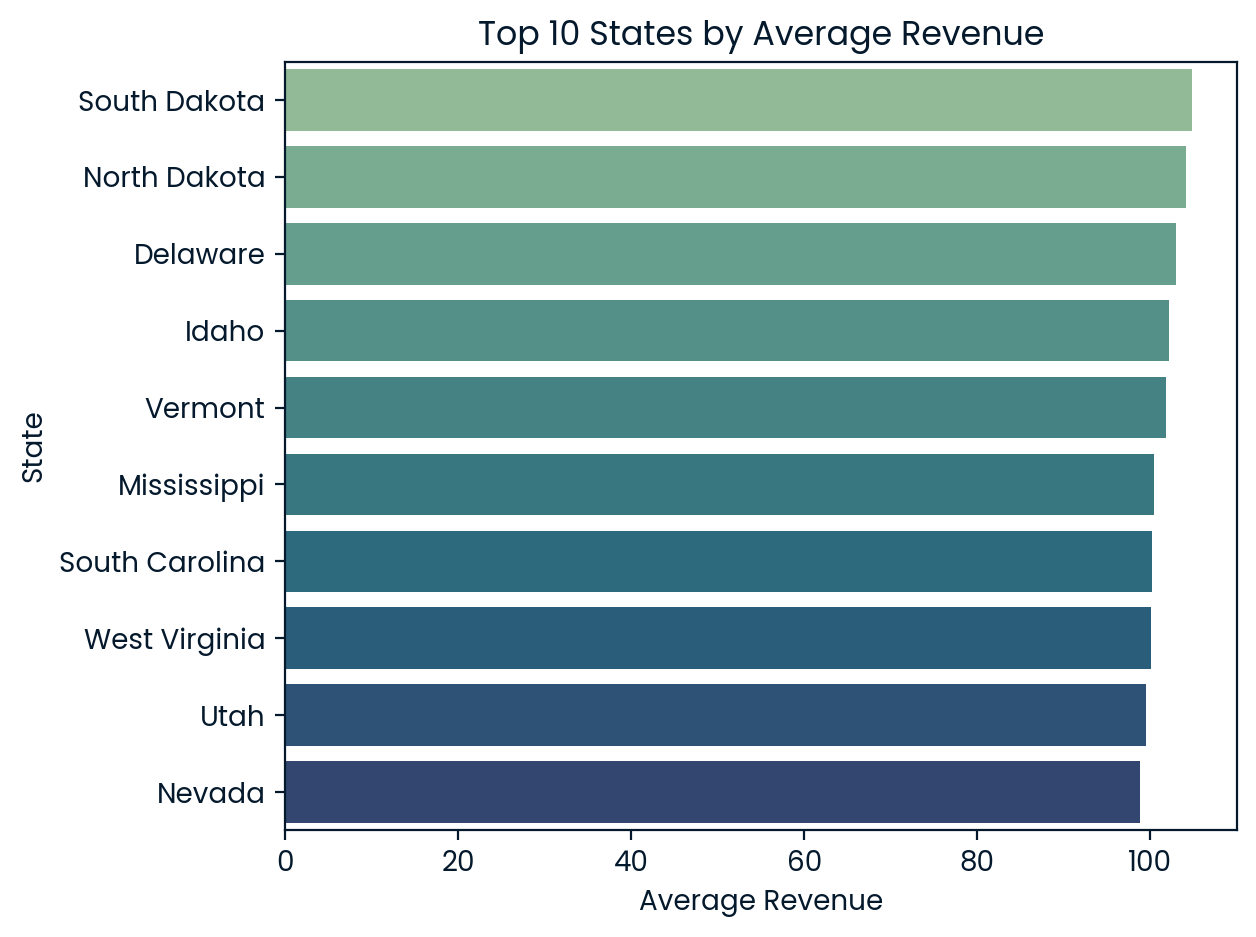

In [49]:
sns.barplot(x=revenue_by_state.values, y=revenue_by_state.index, palette='crest')
plt.title('Top 10 States by Average Revenue')
plt.xlabel('Average Revenue')
plt.ylabel('State')
plt.tight_layout()
plt.show()

**Findings (EN):**
Most customers come from a few dominant states, showing clear regional disparities.
Average revenue also varies some states with fewer customers still generate higher profits.
This suggests that sales potential depends not only on customer count but also on purchasing power in each region.

## 11. Business metrics

In [50]:
kpi_summary = (
    df.groupby('sales_method').agg(
        customers=('customer_id', 'nunique'),
        conversion_rate=('revenue', lambda x: (x > 0).mean()),
        arpc=('revenue', 'mean'),  # Average Revenue per Customer
    )
    .reset_index()
)
kpi_summary

,sales_method,customers,conversion_rate,arpc
0,Calls,4781,1.0,47.597467
1,Email and Call,2223,1.0,183.651233
2,Emails,6922,1.0,97.127684


customers: number of unique customers reached by each sales method. This shows how wide each method scales.

conversion_rate: percentage of customers who generated any revenue (revenue > 0). This measures how effective the method is at turning contact into a sale.

arpc: Average Revenue per Customer. This measures how valuable an average customer is under each sales method, not just whether they bought, but how much they spent.

ARPC tells us how much revenue, on average, we generate from a single customer using a given sales method.
This is useful for the business because:

it captures both conversion and ticket size,

it can be tracked over time to see if a channel is improving or declining,

it lets us directly compare sales methods in terms of money, not just activity.

In other words: the method with the highest ARPC is currently the most profitable per customer and should be prioritized.

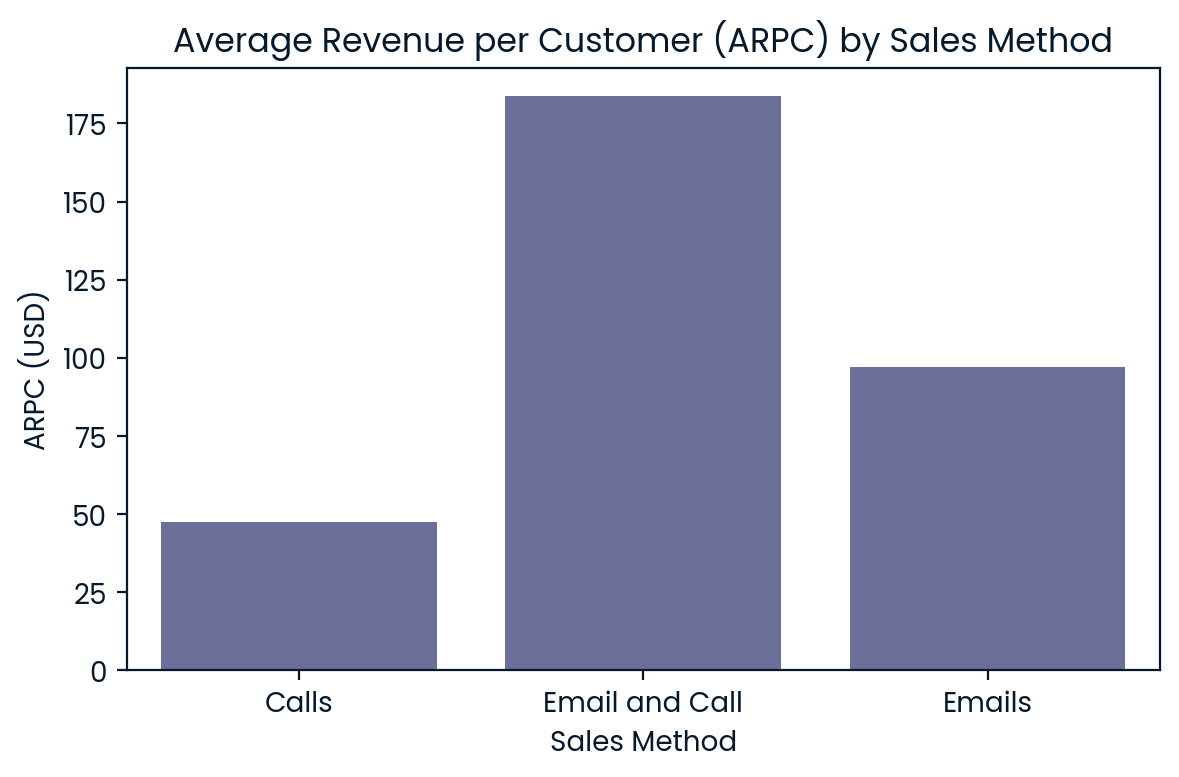

In [52]:
plt.figure(figsize=(6,4))
sns.barplot(
    data=kpi_summary,
    x='sales_method',
    y='arpc'
)
plt.title('Average Revenue per Customer (ARPC) by Sales Method')
plt.xlabel('Sales Method')
plt.ylabel('ARPC (USD)')
plt.tight_layout()
plt.show()

This bar chart compares how much revenue, on average, each sales method produces per customer.
Typically, we expect to see:

Email + Call at the top → highest ARPC.

Call at the bottom → lowest ARPC.

This supports a recommendation: invest more in the combined contact strategy (Email + Call), and review the cost-effectiveness of phone-only outreach.